In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import MyML.metrics.accuracy as acc
import seaborn as sns
import sklearn.cluster as skl_cluster
import scipy.cluster.hierarchy as hie

In [2]:
data_path = "/home/chiroptera/workspace/QCThesis/datasets/iris/iris.csv"
data = np.genfromtxt(data_path, delimiter=',', dtype=np.float32)
gt = np.empty(150, dtype=np.int32)
gt[:50] = 0
gt[50:100] = 1
gt[100:] = 2

In [3]:
sns.set_style("whitegrid")
fig_width = 8
fig_height = 6

markers=['.', '^', '*', 'd', 'v', 'o',
         '<', '>', 's', 'p', '*',
         'h', '+', 'D', 'd', '|', '_']

In [4]:
fig_feature_1 = 0
fig_feature_2 = 1

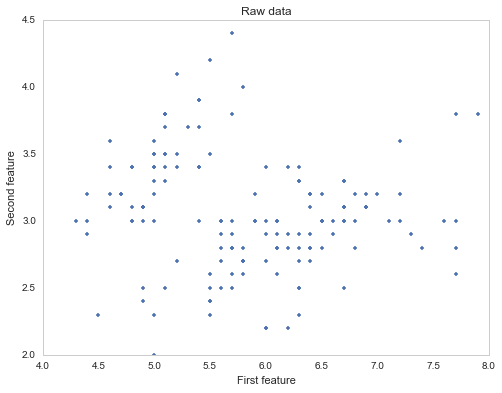

In [18]:
figRaw = plt.figure(figsize=(fig_width,fig_height))
sns.set_palette(sns.color_palette("deep", 6))

ax = figRaw.add_subplot(111)
ax.plot(data[:,fig_feature_1], data[:,fig_feature_2], '.')

ax.set_xlabel("First feature")
ax.set_ylabel("Second feature")
ax.set_title("Raw data")
ax.legend(loc="best")
ax.grid(False, which="both")

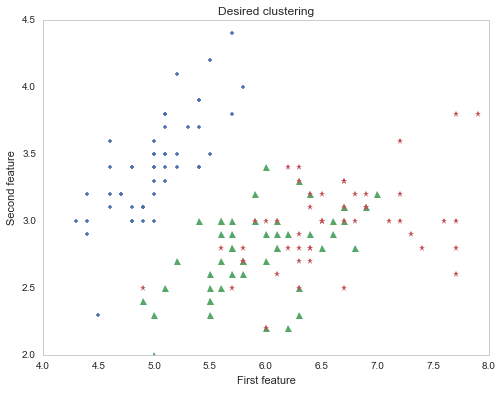

In [125]:
figGT = plt.figure(figsize=(fig_width,fig_height))
sns.set_palette(sns.color_palette("deep", 6))

mi = iter(markers)
ax = figGT.add_subplot(111)
for c in np.unique(gt):
    idx = gt == c
    ax.plot(data[idx,fig_feature_1], data[idx,fig_feature_2], mi.next())

ax.set_xlabel("First feature")
ax.set_ylabel("Second feature")
ax.set_title("Desired clustering")
ax.legend(loc="best")
ax.grid(False, which="both")

# K-Means

I ran the KMeans algorithm with 1 iteration with random initialization until I got a low accuracy score but whose centroids would converge to a good solution. Then I executed the KMeans algorithm until converce, iteration by iteration (saving centoids and labels of each in convergence_list), with the previous centroids as initialization.

In [323]:
convergence_list = list()

In [341]:
convergence_list.append((centroids.copy(), labels.copy()))

In [321]:
# KMeans cluster
kmeans_est = skl_cluster.KMeans(n_clusters=3, init='random', n_init=1, max_iter=1)
keans_res = kmeans_est.fit(data)

# accuracy
acc_est = acc.ConsistencyIndex(data.shape[0])
acc_est.score(gt, kmeans_est.labels_)
print "Accuracy of K-Means: {}".format(acc_est.accuracy)

centroids = keans_res.cluster_centers_
labels = keans_res.labels_

Accuracy of K-Means: 0.666666666667


In [344]:
# KMeans cluster
kmeans_est = skl_cluster.KMeans(n_clusters=3, init=centroids, n_init=1, max_iter=1)
keans_res = kmeans_est.fit(data)
centroids = keans_res.cluster_centers_

# accuracy
acc_est = acc.ConsistencyIndex(data.shape[0])
acc_est.score(gt, kmeans_est.labels_)
print "Accuracy of K-Means: {}".format(acc_est.accuracy)
centroids = keans_res.cluster_centers_
labels = keans_res.labels_

Accuracy of K-Means: 0.886666666667


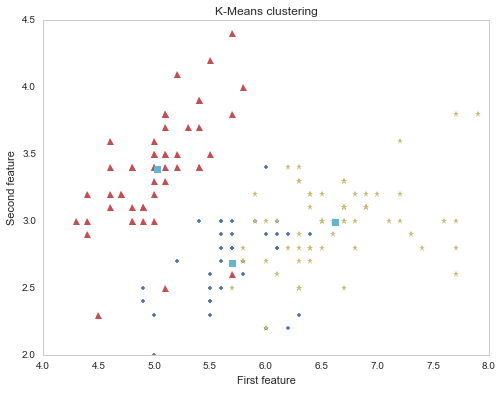

In [326]:
figKM = plt.figure(figsize=(fig_width,fig_height))
sns.set_palette(sns.color_palette("deep", 6))

mi = iter(markers)
ax = figKM.add_subplot(111)
for c in np.unique(labels):
    idx = labels == c
    ax.plot(data[idx,fig_feature_1], data[idx,fig_feature_2], mi.next())
    ax.plot(centroids[:,fig_feature_1], centroids[:,fig_feature_2], 's')

ax.set_xlabel("First feature")
ax.set_ylabel("Second feature")
ax.set_title("K-Means clustering")
ax.legend(loc="best")
ax.grid(False, which="both")

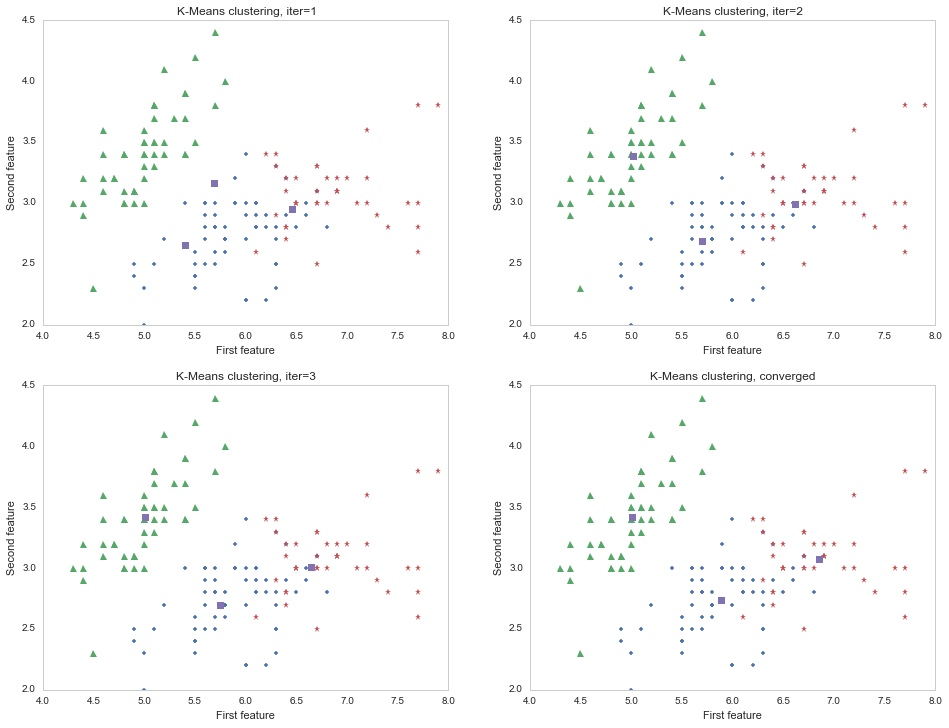

In [348]:
figKM2 = plt.figure(figsize=(fig_width*2,fig_height*2))
sns.set_palette(sns.color_palette("deep", 6))

centroids = convergence_list[0][0]
labels = convergence_list[0][1]
mi = iter(markers)
ax = figKM2.add_subplot(221)
for c in np.unique(kmeans_est.labels_):
    idx = kmeans_est.labels_ == c
    ax.plot(data[idx,fig_feature_1], data[idx,fig_feature_2], mi.next())
ax.plot(centroids[:,fig_feature_1], centroids[:,fig_feature_2], 's')

ax.set_xlabel("First feature")
ax.set_ylabel("Second feature")
ax.set_title("K-Means clustering, iter=1")
ax.legend(loc="best")
ax.grid(False, which="both")


centroids = convergence_list[1][0]
labels = convergence_list[1][1]
mi = iter(markers)
ax = figKM2.add_subplot(222)
for c in np.unique(kmeans_est.labels_):
    idx = kmeans_est.labels_ == c
    ax.plot(data[idx,fig_feature_1], data[idx,fig_feature_2], mi.next())
ax.plot(centroids[:,fig_feature_1], centroids[:,fig_feature_2], 's')

ax.set_xlabel("First feature")
ax.set_ylabel("Second feature")
ax.set_title("K-Means clustering, iter=2")
ax.legend(loc="best")
ax.grid(False, which="both")

centroids = convergence_list[2][0]
labels = convergence_list[2][1]
mi = iter(markers)
ax = figKM2.add_subplot(223)
for c in np.unique(kmeans_est.labels_):
    idx = kmeans_est.labels_ == c
    ax.plot(data[idx,fig_feature_1], data[idx,fig_feature_2], mi.next())
ax.plot(centroids[:,fig_feature_1], centroids[:,fig_feature_2], 's')

ax.set_xlabel("First feature")
ax.set_ylabel("Second feature")
ax.set_title("K-Means clustering, iter=3")
ax.legend(loc="best")
ax.grid(False, which="both")

centroids = convergence_list[-1][0]
labels = convergence_list[-1][1]
mi = iter(markers)
ax = figKM2.add_subplot(224)
for c in np.unique(kmeans_est.labels_):
    idx = kmeans_est.labels_ == c
    ax.plot(data[idx,fig_feature_1], data[idx,fig_feature_2], mi.next())
ax.plot(centroids[:,fig_feature_1], centroids[:,fig_feature_2], 's')

ax.set_xlabel("First feature")
ax.set_ylabel("Second feature")
ax.set_title("K-Means clustering, converged")
ax.legend(loc="best")
ax.grid(False, which="both")

# Single-Link

In [5]:
import scipy

In [6]:
import MyML.EAC.eac_new as eac

Accuracy of Single-Link: 0.68


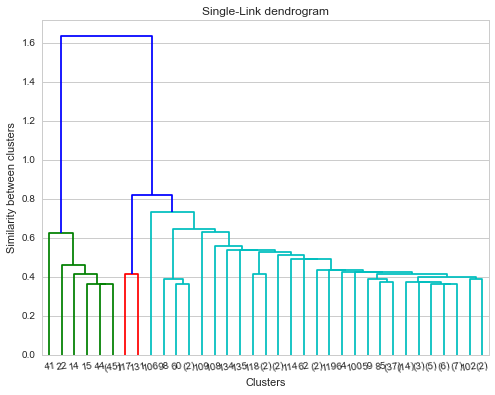

In [15]:
figDendrogram = plt.figure(figsize=(fig_width,fig_height))
plt.xlabel("Clusters")
plt.ylabel("Similarity between clusters")
plt.title("Single-Link dendrogram")
plt.legend(loc="best")
plt.grid(which="both", axis='x')

# pairwise distances in condensed format
pairwise = scipy.spatial.distance.pdist(data)
# cluster
Z = hie.linkage(pairwise, method='single', metric='euclidean')
dendrogram = hie.dendrogram(Z, p=35, truncate_mode='lastp', color_threshold=0.8)
sl_labels = eac.labels_from_Z(Z, 3)

# accuracy
acc_est = acc.ConsistencyIndex(data.shape[0])
acc_est.score(gt, sl_labels)
print "Accuracy of Single-Link: {}".format(acc_est.accuracy)

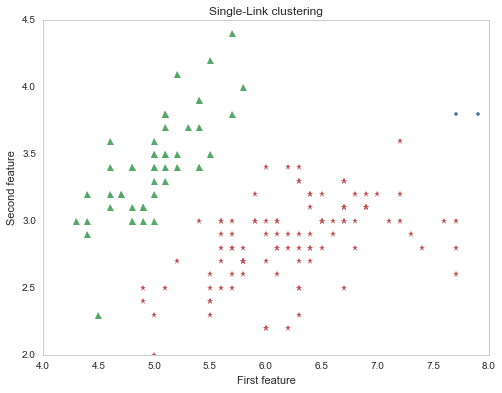

In [8]:
figSL = plt.figure(figsize=(fig_width,fig_height))
sns.set_palette(sns.color_palette("deep", 6))

mi = iter(markers)
ax = figSL.add_subplot(111)
for c in np.unique(sl_labels):
    idx = sl_labels == c
    ax.plot(data[idx,fig_feature_1], data[idx,fig_feature_2], mi.next())

ax.set_xlabel("First feature")
ax.set_ylabel("Second feature")
ax.set_title("Single-Link clustering")
ax.legend(loc="best")
ax.grid(False, which="both")

In [16]:
from MyML.helper.plotting import save_fig

img_folder = '/home/chiroptera/workspace/thesis_writing/rsc/clustering/'
save_fig(figDendrogram, '{}sl_dendrogram'.format(img_folder))

In [349]:
from MyML.helper.plotting import save_fig

img_folder = '/home/chiroptera/workspace/thesis_writing/rsc/clustering/'
save_fig(figRaw, '{}raw_data'.format(img_folder))
save_fig(figGT, '{}desired'.format(img_folder))
save_fig(figKM, '{}kmeans'.format(img_folder))
save_fig(figKM2, '{}kmeans_progress'.format(img_folder))
save_fig(figDendrogram, '{}sl_dendrogram'.format(img_folder))
save_fig(figSL, '{}sl'.format(img_folder))